In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from collections import defaultdict

In [2]:
df1 = pd.read_csv('datatraining.txt', header=0, parse_dates=[0], index_col=0, squeeze=True)

df2= pd.read_csv('datatest.txt', header=0, parse_dates=[0], index_col=0, squeeze=True)

df3= pd.read_csv('datatest2.txt', header=0, parse_dates=[0], index_col=0, squeeze=True)

df4= pd.merge(df2, df1, how='outer')

df=pd.merge(df4, df3, how='outer')

df = df.set_index(['date'])
df1.shape

(8143, 7)

In [3]:
ts = df1['CO2'][:100]

In [4]:
from tslearn.preprocessing import TimeSeriesScalerMeanVariance,TimeSeriesScalerMinMax
from tslearn.piecewise import OneD_SymbolicAggregateApproximation,SymbolicAggregateApproximation, PiecewiseAggregateApproximation

In [5]:
scaler = TimeSeriesScalerMeanVariance(mu=0., std=1.) 
ts = scaler.fit_transform(ts)

In [6]:
# SAX transform
n_paa_segments = 22
n_sax_symbols = 10
sax = SymbolicAggregateApproximation(n_segments=n_paa_segments, alphabet_size_avg=n_sax_symbols)
ts_sax = sax.fit_transform(ts)
sax_ts_inv = sax.inverse_transform(ts_sax)

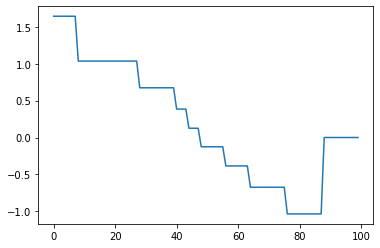

In [7]:
plt.plot(sax_ts_inv.ravel())
plt.show()

In [8]:
map_symbols = {k: v for v, k in enumerate(np.unique(sax_ts_inv.ravel()))}
map_symbols

{-1.0364333894937898: 0,
 -0.6744897501960817: 1,
 -0.38532046640756773: 2,
 -0.12566134685507402: 3,
 0.0: 4,
 0.12566134685507416: 5,
 0.38532046640756773: 6,
 0.6744897501960817: 7,
 1.0364333894937898: 8,
 1.6448536269514722: 9}

In [9]:
seq = np.array([map_symbols[v] for v in sax_ts_inv.ravel()])

In [10]:
data = df1['CO2']

samples = list()
length = 100
# step over the 5,000 in jumps of 200
for i in range(0,8143,length):

    sample = data[i:i+length]
    samples.append(sample)
print(len(samples),type(samples))

X = np.array(samples)
X.shape

82 <class 'list'>


(82,)

In [11]:
scaler = TimeSeriesScalerMeanVariance(mu=0., std=1.)
X = scaler.fit_transform(X)
X.shape

(82, 100, 1)

In [12]:
X_sax = sax.transform(X)
X_sax.shape

C:\Users\Gianmarco\anaconda3\lib\site-packages\tslearn\piecewise.py:35: RuntimeWarning: invalid value encountered in less
  indices = numpy.logical_and(X_symbols < 0, X_paa < bp)


(82, 22, 1)

In [13]:
X_sax_inv = sax.inverse_transform(X_sax)
X_sax_inv.shape

(82, 100, 1)

In [14]:
X_seq = list()
for x in X_sax_inv:
    X_seq.append([map_symbols.get(v,-1) for v in x.ravel()])

# Sequential pattern mining

In [215]:
from prefixspan import PrefixSpan

In [216]:
ps = PrefixSpan(X_seq)

In [217]:
ps.topk(30)

[(82, [2]),
 (82, [2, 2]),
 (82, [2, 2, 2]),
 (82, [2, 2, 2, 2]),
 (82, [2, 2, 2, 2, 2]),
 (82, [2, 2, 2, 2, 2, 2]),
 (82, [2, 2, 2, 2, 2, 2, 4]),
 (82, [2, 2, 2, 2, 2, 2, 4, 4]),
 (82, [2, 2, 2, 2, 2, 2, 4, 4, 4]),
 (82, [2, 2, 2, 2, 2, 2, 4, 4, 4, 4]),
 (82, [2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4]),
 (82, [2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 4]),
 (82, [2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 4, 4]),
 (82, [2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 4, 4, 4]),
 (82, [2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4]),
 (82, [2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4]),
 (82, [2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4]),
 (82, [2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4]),
 (82, [2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4]),
 (82, [2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4]),
 (82, [2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4]),
 (82, [2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4]),
 (82, [2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 4, 

In [218]:
ps.topk(10, closed=True) #A pattern is closed if there is no super-pattern with the same frequency.

[(82,
  [2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4]),
 (80,
  [1, 1, 1, 1, 1, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4]),
 (78,
  [6, 6, 6, 6, 6, 6, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4]),
 (76,
  [3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4]),
 (76,
  [5, 5, 5, 5, 5, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4]),
 (73,
  [8, 8, 8, 8, 8, 8, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4]),
 (70,
  [0, 0, 0, 0, 0, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4]),
 (70,
  [7, 7, 7, 7, 7, 7, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4]),
 (66,
  [2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   4,
   4,
   4,
   4,
   4,
   4,
   4,
   4,
   4,
   4,
   4,
   4,
   4,
   4,
   4,
   4,
   4,
   4]),
 (65,
  [3,
   3,
   3,
   3,
   3,
   3,
   2,
   2,
   2,
   2,
   2,
   2,
   4,
   4,
   4,
   4,
   4,
   4,
   4,
   4,
   4,
   4,
   4,
   4

For both the frequent and the top-k algorithm, you can use a custom callback function callback=lambda patt, matches: ... instead of returning the normal results of patterns and their respective frequencies.

1-When callback function is specified, None is returned.


2-For large datasets, when mining frequent patterns, you can use callback function to process each pattern immediately, and avoid having a huge list of patterns consuming huge amount of memory.


3-The following example finds the longest frequent pattern covering each sequence.

In [219]:
coverage = [[] for i in range(len(X_seq))]

def cover(patt, matches):
    for i, _ in matches:
        coverage[i] = max(coverage[i], patt, key=len)

In [220]:
ps.frequent(24, callback=cover)

In [221]:
print(coverage)

[[9, 9, 9, 9, 9, 9, 8, 8, 8, 8, 8, 8, 6, 6, 6, 6, 6, 6, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4], [9, 9, 9, 9, 9, 9, 8, 8, 8, 8, 8, 8, 6, 6, 6, 6, 6, 6, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4], [9, 9, 9, 9, 9, 9, 8, 8, 8, 8, 8, 8, 6, 6, 6, 6, 6, 6, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4], [9, 9, 9, 9, 9, 9, 8, 8, 8, 8, 8, 8, 6, 6, 6, 6, 6, 6, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4], [9, 9, 9, 9, 9, 9, 8, 8, 8, 8, 8, 8, 6, 6, 6, 6, 6, 6, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4], [8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 6, 6, 6, 6, 6, 6, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4], [9, 9, 9, 9, 9, 9, 6, 6, 6, 6, 6, 6, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4], [3, 3, 3, 3, 

In [162]:
#matches[0][0] > 0 can be used to exclude the patterns covering the first sequence

In [163]:
print(ps.topk(5, filter=lambda patt, matches: matches[0][0] > 0))

[(20, [7, 7, 7, 7, 7, 6, 6, 6, 6, 6, 4]), (20, [7, 7, 7, 7, 7, 6, 6, 6, 6, 6, 4, 4]), (20, [7, 7, 7, 7, 7, 6, 6, 6, 6, 6, 4, 4, 4]), (20, [7, 7, 7, 7, 7, 6, 6, 6, 6, 6, 4, 4, 4, 4]), (20, [7, 7, 7, 7, 7, 6, 6, 6, 6, 6, 4, 4, 4, 4, 4])]
